# Neko Atsume Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Copy of Neko Atsume Data 1.13.0 - Neko Atsume Data v.1.13.0.csv')

In [3]:
df.head()

,Name,Original Row Sort,Snowball,Smokey,Spots,Shadow,Sunny,Fred,Pumpkin,Callie,...,Ramses the Great,Sassy Fran,Billy the Kitten,Frosty,Sapphire,Jeeves,Bengal Jack,Whiteshadow,Hermeowne,Kitty Hawks
0,Cat Index,1,0,1,2,3,4,5,6,7,...,58,59,60,61,62,63,64,65,66,44
1,Power Level,2,80,140,75,50,120,150,90,50,...,230,180,250,5,20,210,66,195,200,100
2,Regular?,3,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,Fish Gift Factor,4,90,120,85,130,70,300,100,75,...,400,290,77,350,15,1200,200,450,400,500
4,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["Name"]

0                  Cat Index
1                Power Level
2                   Regular?
3           Fish Gift Factor
4                        NaN
               ...          
314    Kiddy Rucksack (Blue)
315    Kiddy Rucksack (Lime)
316    Bamboo House (inside)
317       Bamboo House (top)
318            Bamboo Rocket
Name: Name, Length: 319, dtype: object

In [5]:
df.columns

Index(['Name', 'Original Row Sort', 'Snowball', 'Smokey', 'Spots', 'Shadow',
       'Sunny', 'Fred', 'Pumpkin', 'Callie', 'Tabitha', 'Bandit', 'Gabriel',
       'Marshmallow', 'Socks', 'Lexy', 'Bolt', 'Breezy', 'Misty', 'Pickles',
       'Pepper', 'Patches', 'Gozer', 'Cocoa', 'Princess', 'Ginger', 'Peaches',
       'Spud', 'Mack', 'Speckles', 'Willie', 'Rascal', 'Dottie', 'Spooky',
       'Apricot', 'Ganache', 'Pasty', 'Chip', 'Macchiato', 'Melange',
       'Chocola', 'Willow', 'Sooty', 'Quicksilver', 'Maple', 'Caramel',
       'Joe DiMeowgio', 'Senor Don Gato', 'Xerxes IX', 'Chairman Meow',
       'Saint Purrtrick', 'Ms. Fortune', 'Bob the Cat', 'Conductor Whiskers',
       'Tubbs', 'Mr. Meowgi', 'Lady Meow-Meow', 'Guy Furry', 'Kathmandu',
       'Ramses the Great', 'Sassy Fran', 'Billy the Kitten', 'Frosty',
       'Sapphire', 'Jeeves', 'Bengal Jack', 'Whiteshadow', 'Hermeowne',
       'Kitty Hawks'],
      dtype='object')

In [6]:
gaps = []
for i in range(len(df["Name"])):
    # if df["Name"][i] is null, print out the value of i
    if df["Name"][i] is np.nan:
        gaps.append(i)

In [7]:
gaps

[4, 11, 20, 26]

In [8]:
cat_data_df = df[0:4]
cat_food_df = df[5:11]
cat_unk_df = df[12:20]
tubbs_shadow_df = df[21:26]
goodies_df = df[27:]

In [9]:
# cat_data_df

In [10]:
# cat_food_df

In [11]:
# goodies_df

In [12]:
def convert_columns_to_int(df):
    df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)
    return df

In [13]:
cat_food_df = convert_columns_to_int(cat_food_df)
cat_unk_df = convert_columns_to_int(cat_unk_df)
tubbs_shadow_df = convert_columns_to_int(tubbs_shadow_df)
goodies_df = convert_columns_to_int(goodies_df)

## Function to find optimal Food and Goodies for any selected Cat

In [14]:
def Find_Cat_Info(cat_name):
    cat_data = cat_data_df[["Name", cat_name]]
    return(cat_data)

def Find_Cat_Food(cat_name):
    cat_data = cat_food_df[["Name", cat_name]]
    cat_data = cat_data[cat_data[cat_name] > 0].sort_values(by = [cat_name], ascending = False)
    return(cat_data)

def Find_Cat_Goodies(cat_name):
    cat_data = goodies_df[["Name", cat_name]]
    cat_data = cat_data[cat_data[cat_name] > 0].sort_values(by = [cat_name], ascending = False)
    return(cat_data)

In [15]:
# # For example, lets take Spots
# cat_name = "Spots"

In [16]:
# Find_Cat_Info(cat_name)

In [17]:
# Find_Cat_Food(cat_name)

In [18]:
# Find_Cat_Goodies(cat_name)

In [19]:
def Optimize_Cat(cat_name):
    def filter_rows_greater_than_50_percent(df):
        first_score = df[cat_name].max()
        df = df[df[cat_name] > (0.5 * first_score)]
        return df
    
    print("Optimal Food")
    food_df = Find_Cat_Food(cat_name)
    display(food_df)

    print("Optimal Goodies")
    goodie_df = Find_Cat_Goodies(cat_name)
    # We don't want to print everything because the screen gets cluttered.
    if len(goodie_df) > 7:
        goodie_df  = filter_rows_greater_than_50_percent(goodie_df)
    display(goodie_df)    

In [20]:
# Cat names for reference
df.columns[2:]

Index(['Snowball', 'Smokey', 'Spots', 'Shadow', 'Sunny', 'Fred', 'Pumpkin',
       'Callie', 'Tabitha', 'Bandit', 'Gabriel', 'Marshmallow', 'Socks',
       'Lexy', 'Bolt', 'Breezy', 'Misty', 'Pickles', 'Pepper', 'Patches',
       'Gozer', 'Cocoa', 'Princess', 'Ginger', 'Peaches', 'Spud', 'Mack',
       'Speckles', 'Willie', 'Rascal', 'Dottie', 'Spooky', 'Apricot',
       'Ganache', 'Pasty', 'Chip', 'Macchiato', 'Melange', 'Chocola', 'Willow',
       'Sooty', 'Quicksilver', 'Maple', 'Caramel', 'Joe DiMeowgio',
       'Senor Don Gato', 'Xerxes IX', 'Chairman Meow', 'Saint Purrtrick',
       'Ms. Fortune', 'Bob the Cat', 'Conductor Whiskers', 'Tubbs',
       'Mr. Meowgi', 'Lady Meow-Meow', 'Guy Furry', 'Kathmandu',
       'Ramses the Great', 'Sassy Fran', 'Billy the Kitten', 'Frosty',
       'Sapphire', 'Jeeves', 'Bengal Jack', 'Whiteshadow', 'Hermeowne',
       'Kitty Hawks'],
      dtype='object')

In [21]:
Optimize_Cat("Hermeowne")

Optimal Food


,Name,Hermeowne
10,Food: Bonito Bitz,10
5,Food: Thrifty Bitz,1
7,Food: Ritzy Bitz,1
8,Food: Sashimi,1
9,Food: Deluxe Tuna Bitz,1


Optimal Goodies


,Name,Hermeowne
295,Egg Bed (Nightview) (top),10


## Data Analysis

In [22]:
temp = cat_data_df.drop("Original Row Sort", axis = 1, inplace = False)
temp = temp.T
temp.columns = temp.iloc[0]
temp = temp[1:]

In [28]:
def add_count_on_top_of_bar(countplot):
    for p in countplot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        countplot.annotate(int(count), (x, y), ha='center', va='bottom')

    return countplot

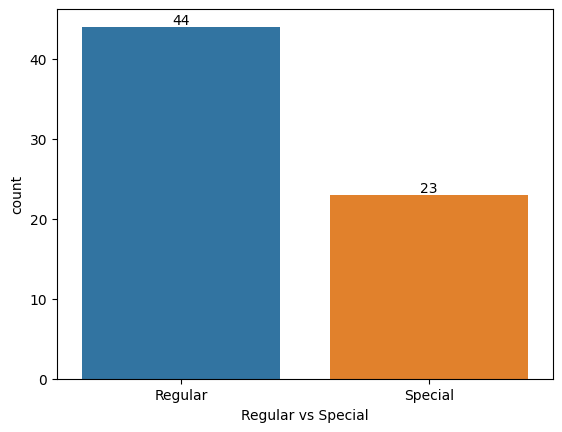

In [24]:
countplot = sns.countplot(x = temp['Regular?'])
countplot = add_count_on_top_of_bar(countplot)
plt.xticks([0, 1], ['Regular', 'Special'])
plt.xlabel("Regular vs Special")

plt.show()

In [33]:
regular_cats = temp[temp['Regular?'] == "TRUE"].drop('Regular?', axis = 1)
special_cats = temp[temp['Regular?'] == "FALSE"].drop('Regular?', axis = 1)

In [34]:
regular_cats.head()

Name,Cat Index,Power Level,Fish Gift Factor
Snowball,0,80,90
Smokey,1,140,120
Spots,2,75,85
Shadow,3,50,130
Sunny,4,120,70


In [35]:
special_cats.head()

Name,Cat Index,Power Level,Fish Gift Factor
Joe DiMeowgio,45,28,400
Senor Don Gato,50,30,300
Xerxes IX,47,70,950
Chairman Meow,54,111,250
Saint Purrtrick,48,222,700
